In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/chess_pieces_dataset.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

# import dependecy

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization

# Load Data

In [33]:
image_size = (128, 128)
batch = 32

dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/chess_pieces_dataset',
    labels='inferred',
    label_mode='int',
    batch_size=batch,
    image_size=image_size,
)

Found 1200 files belonging to 6 classes.


In [36]:
dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)
val_size = dataset_size - train_size

print(f'Dataset size: {dataset_size}')
print(f'Train size: {train_size}')
print(f'Validation size: {val_size}')

train = dataset.take(train_size)
validation = dataset.skip(train_size).take(val_size)

Dataset size: 38
Train size: 30
Validation size: 8


In [37]:
AUTOTUNE = tf.data.AUTOTUNE
train = train.cache().prefetch(buffer_size=AUTOTUNE)
validation = validation.cache().prefetch(buffer_size=AUTOTUNE)

# Separate Label and dataset

In [38]:
def dataset_to_tensors(dataset):
    images = []
    labels = []
    for img, lbl in dataset.unbatch():
        images.append(img.numpy())
        labels.append(lbl.numpy())
    return tf.convert_to_tensor(images), tf.convert_to_tensor(labels)

In [39]:
x_train, y_train = dataset_to_tensors(train)
x_test, y_test = dataset_to_tensors(validation)

In [40]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(960, 128, 128, 3)
(960,)
(240, 128, 128, 3)
(240,)


In [41]:
classes = dataset.class_names
print(f'{classes}')

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']


[]

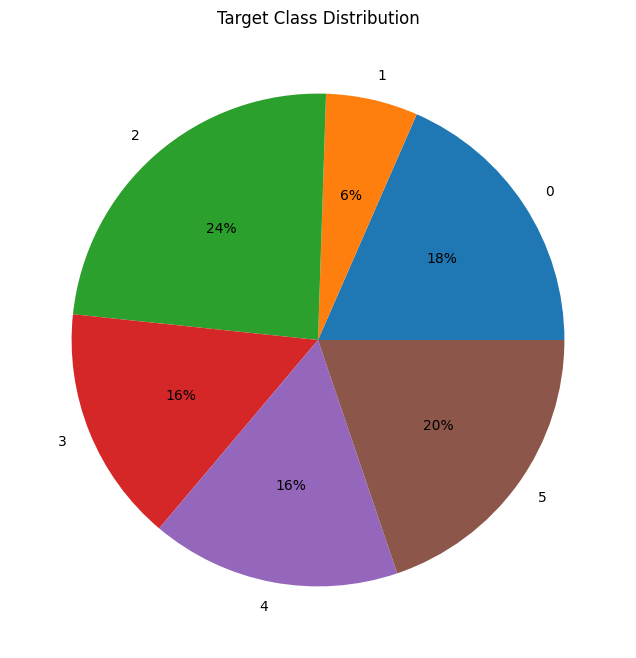

In [23]:
unique, count=np.unique(y_train, return_counts=True)
plt.figure(figsize=(10, 8))
plt.pie(count, labels=unique, autopct='%.0f%%')
plt.title('Target Class Distribution')
plt.plot()

# Exploring Data

In [ ]:
# Creating a function to visualize the images
import random

def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    #if not image_filenames:
        #raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

BISHOP


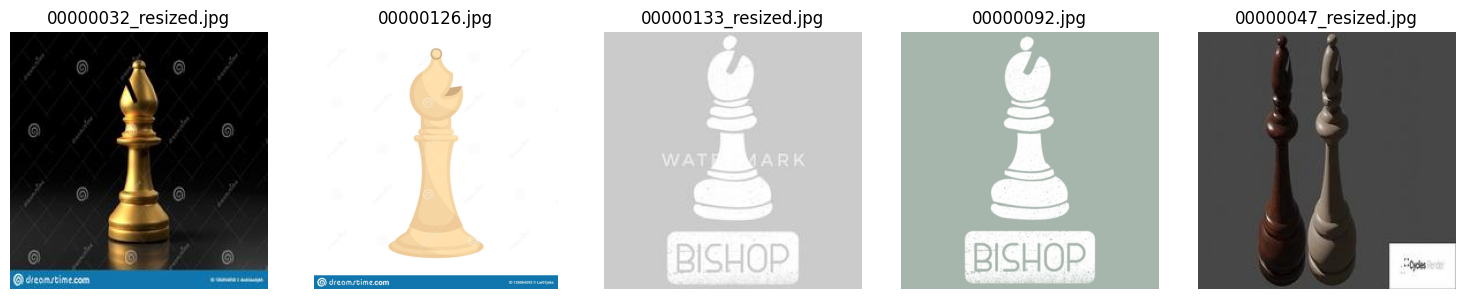

KING


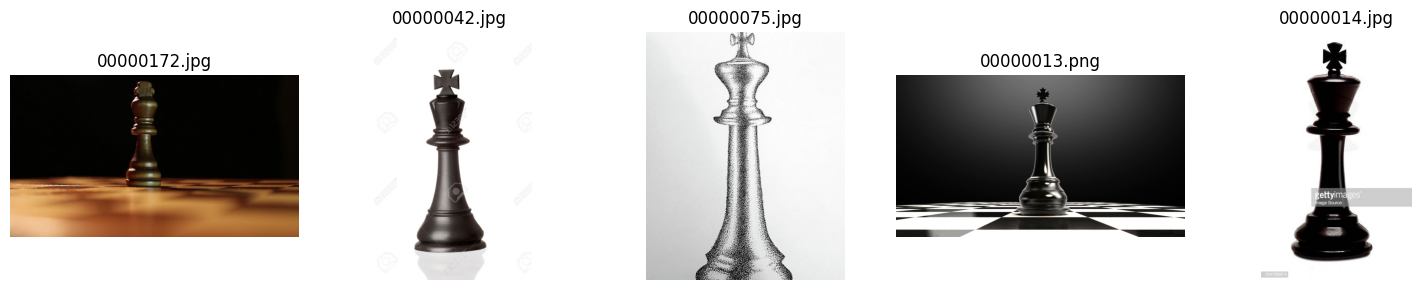

KNIGHT


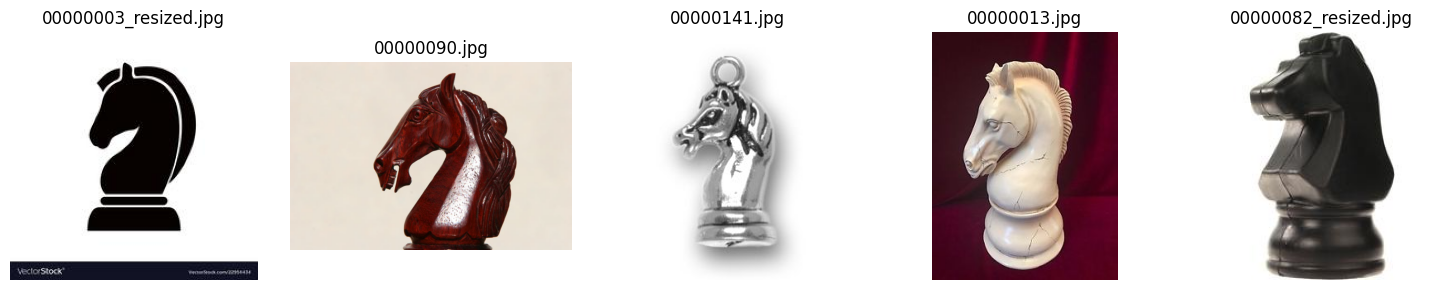

PAWN


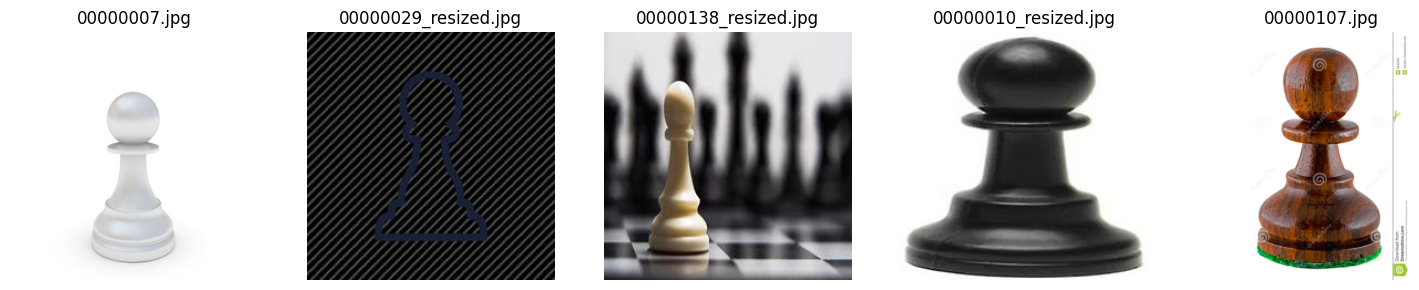

QUEEN


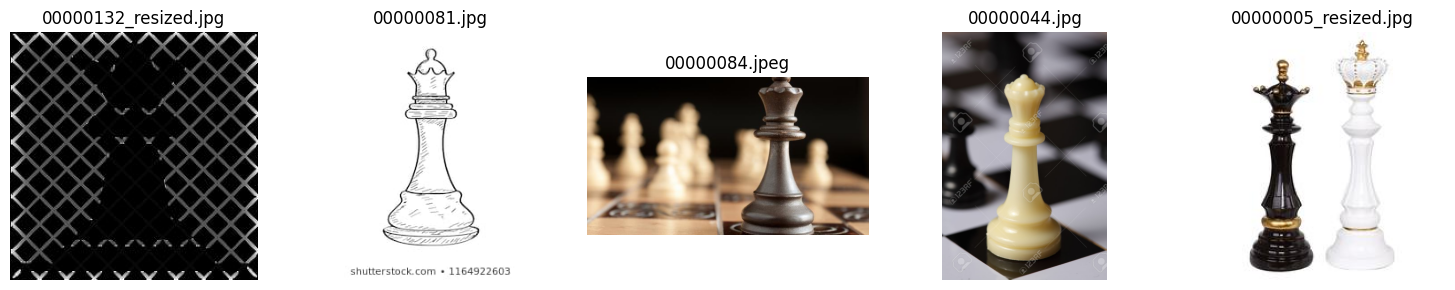

ROOK


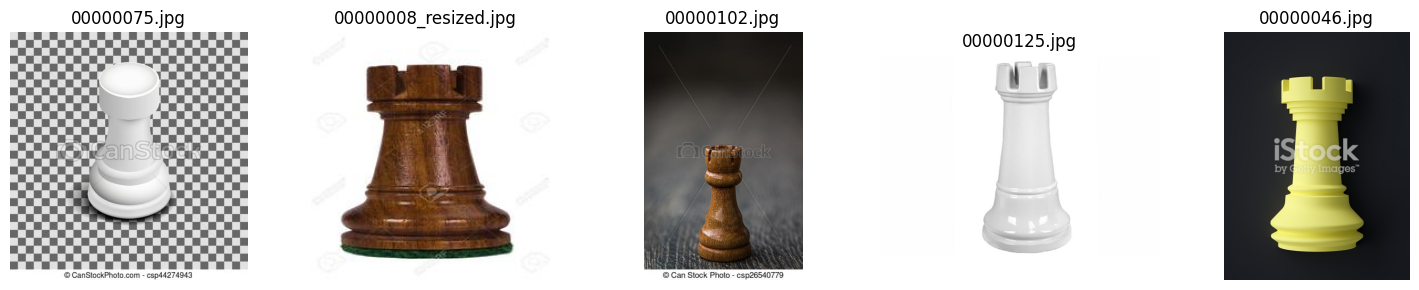

In [ ]:


import os
# Iterating through each class to plot its images
for label in classes:
    # Specify the path containing the images to visualize
    path_to_visualize = os.path.join("/content/chess_pieces_dataset",label)

    # Visualize 5 random images
    print(label.upper())
    visualize_images(path_to_visualize, num_images=5)


# Min Max Scalling

In [ ]:
# Convert the data type of the images to float32
x_train = tf.cast(x_train, tf.float32)  # tf.cast is used to convert the image tensors to float32.
x_test = tf.cast(x_test, tf.float32)

# Normalize the pixel values to a range between 0 and 1
x_train /= 255.0
x_test /= 255.0  #The pixel values of the images are normalized by dividing by 255.0.

# Print the shapes of the original training data and labels
print("X_train shape: {} \nY_train shape: {}".format(x_train.shape, y_train.shape))
print("X_test shape: {} \nY_test shape: {}".format(x_test.shape, y_test.shape))


X_train shape: (960, 128, 128, 3) 
Y_train shape: (960,)
X_test shape: (240, 128, 128, 3) 
Y_test shape: (240,)


In [ ]:
# Convert class vectors to binary class matrices / one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 6)
y_test = to_categorical(y_test, 6)


In [44]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (960, 128, 128, 3)
y_train shape: (960, 6)


# Construction of the Model

In [45]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 407,494 (1.55 MB)

 Trainable params: 406,534 (1.55 MB)

 Non-trainable params: 960 (3.75 KB)

# Training

In [47]:
import time

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

start = time.time()

epochs = 120
model.fit(
    x_train, y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
);

end = time.time()

# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

model.save('model.keras')

Epoch 1/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.1706 - loss: 2.9028 - val_accuracy: 0.1458 - val_loss: 1.8822
Epoch 2/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.1943 - loss: 2.4832 - val_accuracy: 0.2125 - val_loss: 1.9451
Epoch 3/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2619 - loss: 2.3088 - val_accuracy: 0.1542 - val_loss: 2.0917
Epoch 4/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2235 - loss: 2.2415 - val_accuracy: 0.1375 - val_loss: 1.8795
Epoch 5/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2772 - loss: 2.0396 - val_accuracy: 0.1917 - val_loss: 1.7794
Epoch 6/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2853 - loss: 2.0425 - val_accuracy: 0.2542 - val_loss: 1.7453
Epoch 7/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2695 - loss: 1.9449 - val_accuracy: 0.2625 - val_loss: 1.7517
Epoch 8/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3381 - loss: 1.8472 - val_accuracy: 0

# Evaluasi Model

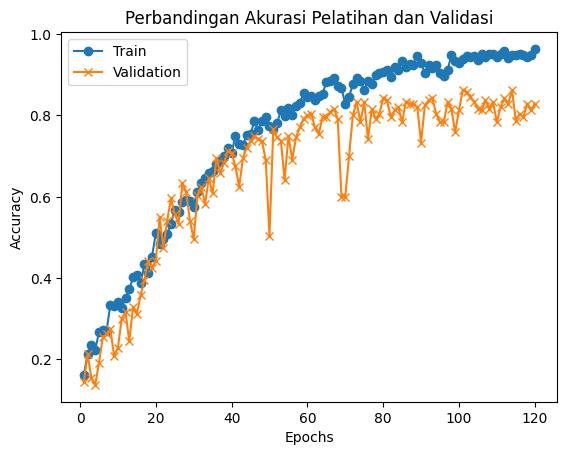

In [48]:
epochs_range = [i+1 for i in range(epochs)]
plt.plot(epochs_range, model.history.history['accuracy'], '-o', label='Train')
plt.plot(epochs_range, model.history.history['val_accuracy'], '-x',label='Validation')
plt.title('model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Perbandingan Akurasi Pelatihan dan Validasi')

plt.legend();

In [49]:
# prompt: print final acc loss test and train model

test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)
train_loss, train_acc = model.evaluate(x_train, y_train)
print('\nTrain accuracy:', train_acc)
print('\nTrain loss:', train_loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8288 - loss: 0.6459

Test accuracy: 0.8291666507720947

Test loss: 0.5675489902496338
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9981 - loss: 0.0126

Train accuracy: 0.9958333373069763

Train loss: 0.019392188638448715


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8288 - loss: 0.6459
Test Loss: 0.5675
Test Accuracy: 0.8292
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


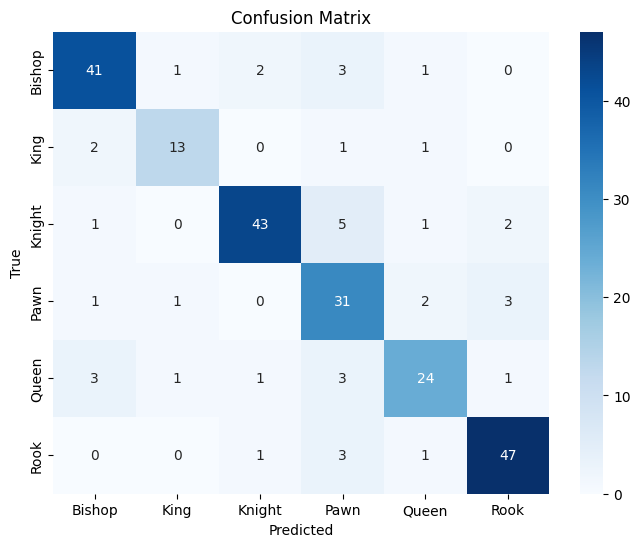

In [50]:
# prompt: code untuk evaluasi model yang cocok untuk pengolahan citra

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# To Anvil

In [18]:
!pip install anvil-uplink

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 4.2 MB/s eta 0:00:00


In [ ]:
import anvil.server
import anvil.media
from keras.models import load_model
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Fill this with your Anvil Uplink key
anvil.server.connect("")

# Load model once
ModelCNN = load_model("model.keras")
LabelKelas = ("Bishop", "King", "Knight", "Pawn", "Queen", "Rook")

@anvil.server.callable
def predict_chess(img):
    if img is None:
        return "Gagal membaca gambar"

    with anvil.media.TempFile(img) as file_path:
        img = cv2.imread(file_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        print("Shape after resize:", img.shape)
        img = img.astype('float32') / 255.0
        img = np.expand_dims(img, axis=0)
        print("Final input shape:", img.shape)

        # Predict
        prediction = ModelCNN.predict(img)
        print(prediction)
        predicted_idx = np.argmax(prediction[0])
        print(predicted_idx)
        if prediction[0][predicted_idx] > .5:
            print("Prediksi Kelas:", LabelKelas[predicted_idx])
            return LabelKelas[predicted_idx]
        else:
            return "Tidak yakin dengan prediksi"

anvil.server.wait_forever()

Shape after resize: (128, 128, 3)
Final input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
[[2.7646471e-03 3.2829837e-04 3.0807588e-01 6.5292203e-01 7.0560374e-03
  2.8853077e-02]]
3
Prediksi Kelas: Pawn
Shape after resize: (128, 128, 3)
Final input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.51427704 0.03875937 0.05165464 0.20042993 0.11142343 0.08345564]]
0
Prediksi Kelas: Bishop
Shape after resize: (128, 128, 3)
Final input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[3.8529574e-03 1.9597764e-04 4.0229395e-05 9.9552673e-01 2.9749036e-04
  8.6478336e-05]]
3
Prediksi Kelas: Pawn
Shape after resize: (128, 128, 3)
Final input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[8.8727022e-05 1.5620500e-01 4.4201720e-06 1.6346235e-04 8.4353477e-01
  3.6659717e-06]]
4
Prediksi Kelas: Queen
Shape after resize: (128, 128, 3)
Final input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[2.0709455e-04 1.824081